# Funciones de distribución de probabilidades

### Distribución Uniforme

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
a= 1  #Definimos el limite inferior.
b = 100 # Definimos el limite superior.
n = 1000000 #Numero de muestras.
data = np.random.uniform(a, b, n) #Generamos una funcion uniforme con a, b y n

(array([ 99749., 100106.,  99992., 100118., 100127., 100310.,  99715.,
        100015.,  99889.,  99979.]),
 array([ 1.00005889, 10.90004174, 20.80002458, 30.70000743, 40.59999028,
        50.49997313, 60.39995597, 70.29993882, 80.19992167, 90.09990452,
        99.99988736]),
 <BarContainer object of 10 artists>)

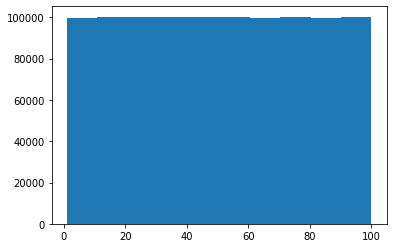

In [5]:
%matplotlib inline 
plt.hist(data) #Creamos una grafica con el historico de data.
#Parecen no ser numeros uniformes pero esto se van haciendo mas uniformes a medida que el numero de muestras es mayor. Este es un problema inherente de que el muestreo es poco si vamos aumentando n la grafica del histograma se va aplanando.

### Distribución normal (Campana de Gaussi)

In [6]:
data = np.random.randn(1000000) #Randn nos permite generar valores en distribucion normal.

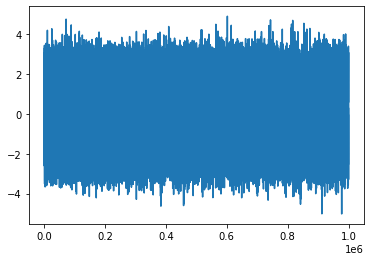

In [7]:
x = range(1,1000001) #Definimos el eje de las x de que valor a que valor van.
plt.plot(x, data) #Se crea un plot con x y en y se define la altura mayor del dato

(array([2.80000e+01, 1.16300e+03, 1.90020e+04, 1.25081e+05, 3.27520e+05,
        3.48636e+05, 1.50412e+05, 2.63420e+04, 1.76700e+03, 4.90000e+01]),
 array([-5.01599861, -4.02653678, -3.03707496, -2.04761313, -1.05815131,
        -0.06868948,  0.92077234,  1.91023416,  2.89969599,  3.88915781,
         4.87861964]),
 <BarContainer object of 10 artists>)

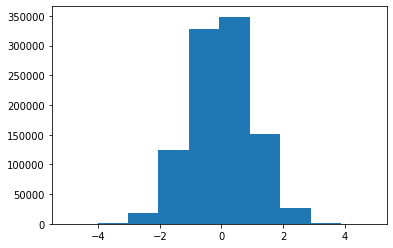

In [8]:
#Se crea el history de data y muestra una campana en los datos. Entre mas numeros tenga data se ve mejor la campana.
plt.hist(data)

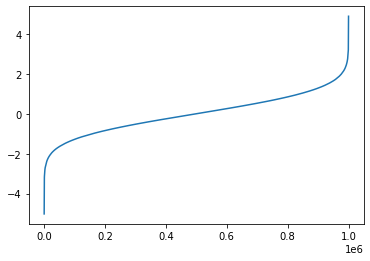

In [9]:
plt.plot(x,sorted(data)) #Ordenamos los datos y creamos un plot para validar que la generación sea gaussiana es decir crece poco en el inicio y el final y se acumula todo entre mas se acerque al 0.

(array([  12.,   96.,  487., 1588., 2732., 2746., 1608.,  607.,  108.,
          16.]),
 array([-4.09373069, -2.1959121 , -0.2980935 ,  1.5997251 ,  3.4975437 ,
         5.3953623 ,  7.29318089,  9.19099949, 11.08881809, 12.98663669,
        14.88445529]),
 <BarContainer object of 10 artists>)

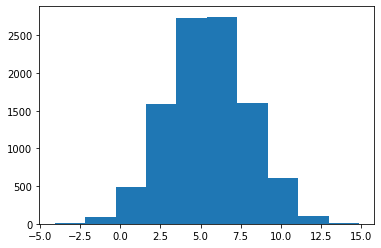

In [10]:
#Crear una normal con otra media que no sea 0 y otra desviación tipica diferente a 1.
#formula origina =  Z = (X -mu) / sd --> N(0,1) -- formula despejada = X = mu + sd * Z  
mu = 5.5 #Definimos el valor de la media.
sd = 2.5 #Definimos la desviación tipica.
Z_10000 = np.random.randn(10000) #Definimos los valores a generar.
data = mu + sd*Z_10000 #Aplicamos la formular para crear una gaussiana con los valores que necesitamos. 
plt.hist(data) #Creamos el histori de data para validar qeu es una campana de gauss.

In [11]:
#Usamos la funcion para crear 2 arreglos de 4 elementos, es lo que normalmente se hace en un data set para generar datos. Estos se generan en distribucion de campana de gauss o distribución normal.
data = np.random.randn(2,4)
data

array([[ 0.16753499,  0.22533306,  0.252761  , -2.51545769],
       [ 0.97629031,  0.452943  , -2.31338291,  2.85651264]])

### Simulación de Monte Carlo

* Generamos 2 numeros aleatorios uniforme x y 'y' entre 0 y 1.
* Calcularemos x^2 + Y^2.
    * Si el valor es inferior a 1  --> Estamos dentro del circulo.
    * Si el valor es superior a 1  --> Estamos fuera del circulo.
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para obtener una aproximacion de la probabilidad de caer dentro del circulo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimiento un numero suficiente de veces ej(1000), para obtener diferentes aproximaciones de π.
* Calculamos el promedio de los 1000 experimientos anteriores para dar un valor final de  π.
    



In [12]:
def pi_montecarlo(n, n_exp): #Definimos la funcion y se requiere n que es el numero de puntos en simulación y n_exp el numero de veces que se hara la simulación.
    pi_avg = 0 #Inicializamos la variable pi_avg en 0 y despues asignarle un valor.
    pi_value_list = [] # Creamos una lista vacia para ir agregando valores que se generaran.
    for i in range(n_exp): #Creamso un for para recorrer el numero de simulaciones que se haran.
        value = 0 #Creamos la variable value y la inicializamos en 0.
        x = np.random.uniform(0, 1, n).tolist() #Cramos una lista con  n objetos, con valores entre 0 y 1 de manera uniforme.
        y = np.random.uniform(0, 1, n).tolist() #Cramos una lista con  n objetos, con valores entre 0 y 1 de manera uniforme.
        for j in range(n): #Creamos un ciclo para recorrer los objetos en los objetos definidos por n.
            z = np.sqrt(x[j] * x[j] + y[j] * y[j]) # Definimos la formula z = x^2 + y^2 del valor que se esta leyendo en el ciclo.
            if z<=1: #Validamos si z es menor o igual que 1.
                value += 1 #Incrementamos en 1 la variable value.
        float_value = float(value) # Convertimos en flotante la variable value.
        pi_value = float_value*4/n #Creamos pi value y lo multiplicamos por 4 y dividimos entre el numero de objetos creados en la simualación.
        pi_value_list.append(pi_value) # Agregamos el valor de pi_value a la lista.
        pi_avg += pi_value # asignamos el valor de pi_value a pi_avg.
        

    pi = pi_avg/n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)
        

3.141563999999998


(3.141563999999998, [<matplotlib.lines.Line2D at 0x1f968cfec40>])

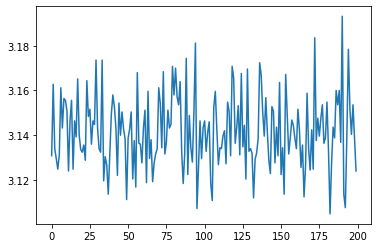

In [14]:
pi_montecarlo(10000, 200)

# Dummy Data Sets

 * Creamos un data Set usando la generación de numeros aleatorios que aprendimos. Los df se crean en forma de diccionarios donde la key es el valor de la columna y el value es el valor de los datos en la columna. En este caso se creara 3 columnas con 10 filas cada uno. El numero de filas que tendra la columna debe ser igual para todas las columnas. Ej: en esta se definira 10 filas.

In [24]:
n= 1000000 #Se define variable para el numero de filas que queremos generar en el dataframe.
data = pd.DataFrame(
    {
        'A' : np.random.randn(n), #Distribución normal o de gauss. Genera valores entre 0 y 1.
        'B' : 1.5 + 2.5 * np.random.randn(n), # Normal con media 1.5 y desviación de 2.5 * random. 
        'C' : np.random.uniform(5, 32, n) #Distribución uniforme entre 5 y 32.
        
    }
)

In [32]:
data.describe() #Describe como esta dostribuida la información del df y sus valores de media ... etc.

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000121,1.501612,18.511263
std,0.999939,2.502564,7.798836
min,-5.088762,-9.835167,5.000044
25%,-0.674599,-0.186684,11.757908
50%,0.000040,1.497463,18.520110
75%,0.673854,3.186682,25.264547
max,5.052961,14.144562,31.999921


(array([1.89000e+02, 4.25900e+03, 4.42700e+04, 1.94236e+05, 3.60966e+05,
        2.84228e+05, 9.69870e+04, 1.39740e+04, 8.74000e+02, 1.70000e+01]),
 array([-9.83516717, -7.43719427, -5.03922137, -2.64124848, -0.24327558,
         2.15469732,  4.55267022,  6.95064311,  9.34861601, 11.74658891,
        14.1445618 ]),
 <BarContainer object of 10 artists>)

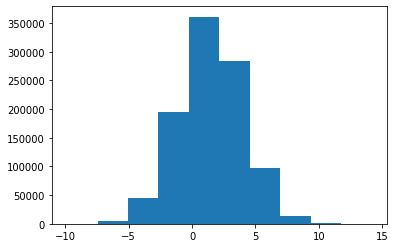

In [33]:
plt.hist(data['B']) #Creamos un histograma de data para validar que la distribución se aplique correctamente.

(array([ 99865., 100106.,  99794.,  99812.,  99685.,  99691., 100481.,
         99698., 100303., 100565.]),
 array([ 5.00004351,  7.70003125, 10.40001898, 13.10000672, 15.79999446,
        18.4999822 , 21.19996994, 23.89995768, 26.59994542, 29.29993315,
        31.99992089]),
 <BarContainer object of 10 artists>)

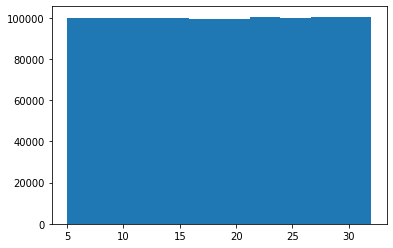

In [35]:
plt.hist(data['C']) #Creamos un histogramapara validar la distribución uniforme.

In [39]:
data = pd.read_csv('../python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt')

In [40]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [41]:
colum_names = data.columns.values.tolist() #Extrae los nombres de las columnas en lista.

In [42]:
a = len(colum_names) #Comprobar cuantos valores tiene colum.
a


21

In [49]:
new_data = pd.DataFrame(
    {
        'Column Name' : colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a) #Creamos las columnas con los valores uniformes.
    }, index = range(42,42 + a) #Con index inicia el indexado personalizado en este caso apartir de 42.
)

In [50]:
new_data

,Column Name,A,B
42,State,-2.329525,0.065583
43,Account Length,-1.147248,0.133330
44,Area Code,1.730375,0.906289
45,Phone,-1.031872,0.095396
46,Int'l Plan,-0.426359,0.384588
47,VMail Plan,-0.326620,0.236841
48,VMail Message,0.412210,0.813802
49,Day Mins,-0.145832,0.757447
50,Day Calls,-0.474488,0.066323
51,Day Charge,0.797687,0.193021
